In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [15]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [19]:
df.drop(["day", "month", "year"],axis=1, inplace=True)

In [20]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [21]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [22]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [24]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,0


In [25]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [26]:
##independent and dependent feature 
X = df.drop("FWI", axis=1)
y = df["FWI"]

In [27]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,1


In [28]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [30]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [31]:
## feature selection based on correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,-0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,-0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,-0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,-0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,-0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,-0.188837


<Axes: >

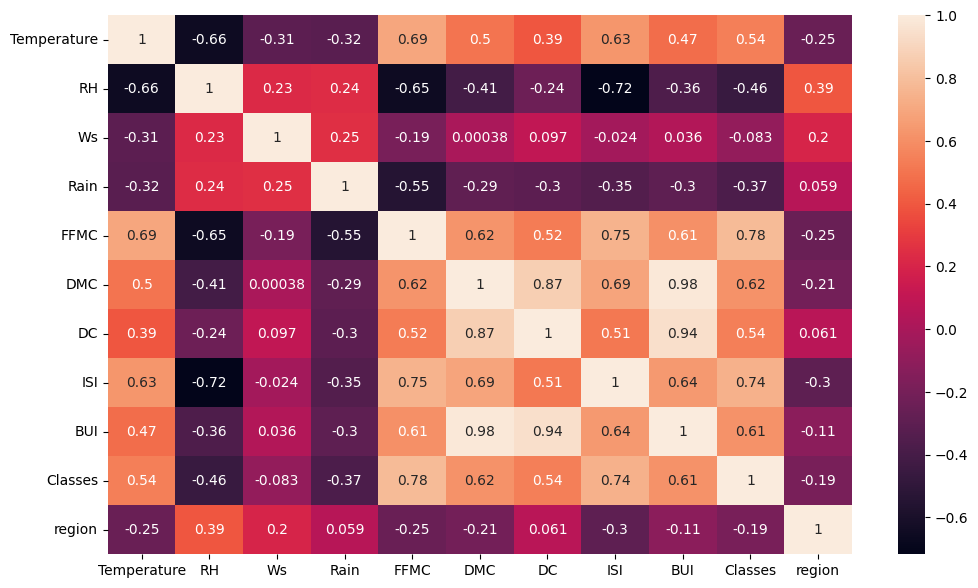

In [32]:
## check for multicollinearty 
plt.figure(figsize=(12,7))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [33]:
def correlation(dataset, threshold):
    col_corr = set()
    cor_matrix = dataset.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i,j]) > threshold:
                colname = cor_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [34]:
corr_feature = correlation(X_train, 0.85)

In [35]:
corr_feature

{'BUI', 'DC'}

In [36]:
##drop feature when correlation in more than 0.85
X_train.drop(corr_feature, axis=1, inplace=True)
X_test.drop(corr_feature, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526,  0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526, -1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851, -1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526,  0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851, -1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526,  0.98907071]])

Box plot to understan to effect of standard scaler

Text(0.5, 1.0, 'X train after scaling')

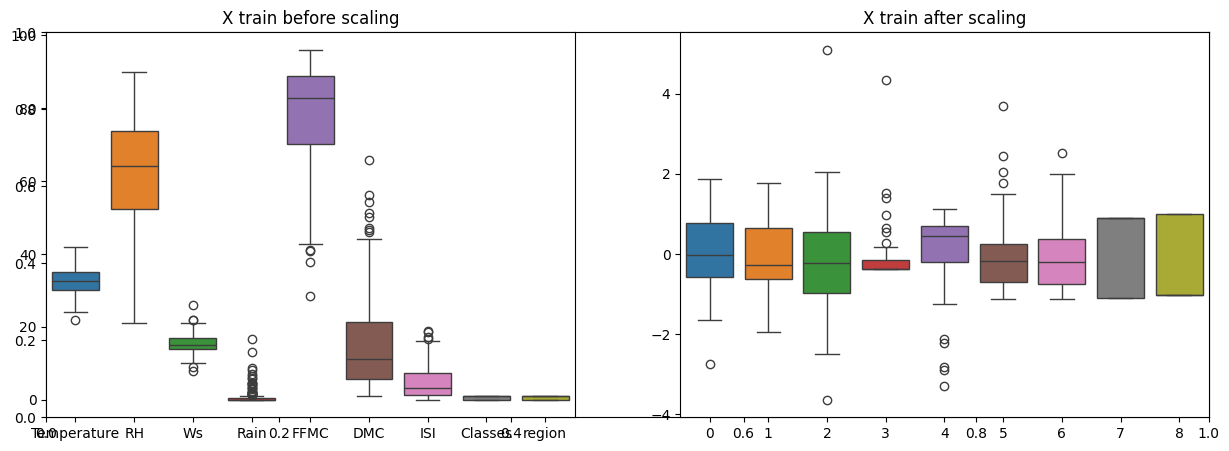

In [41]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_test_scaled)
plt.title("X train after scaling")


linear regression model

mean absoulute error 0.5468236465249978
r2 scpre 0.9847657384266951


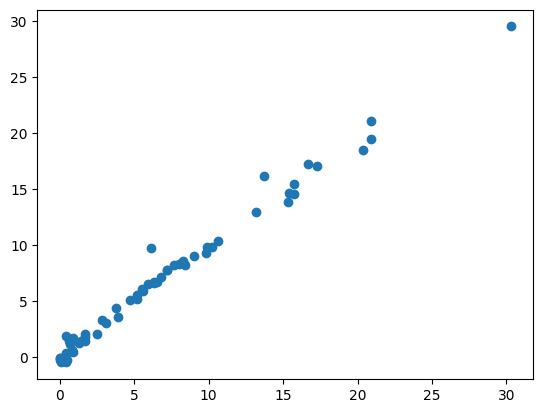

In [42]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

Lasso regression

mean absoulute error 1.133175994914409
r2 scpre 0.9492020263112388


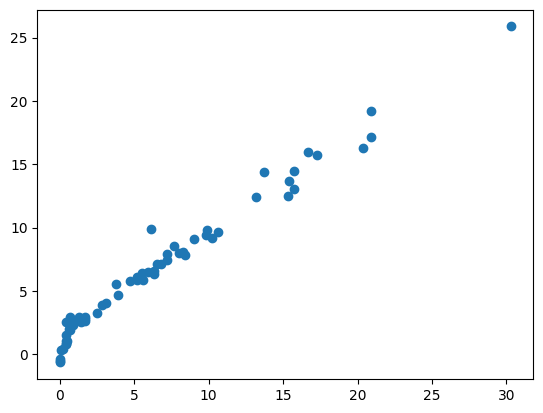

In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

In [46]:
from sklearn.linear_model import LassoCV 
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [47]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [49]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [50]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

mean absoulute error 0.619970115826343
r2 scpre 0.9820946715928275


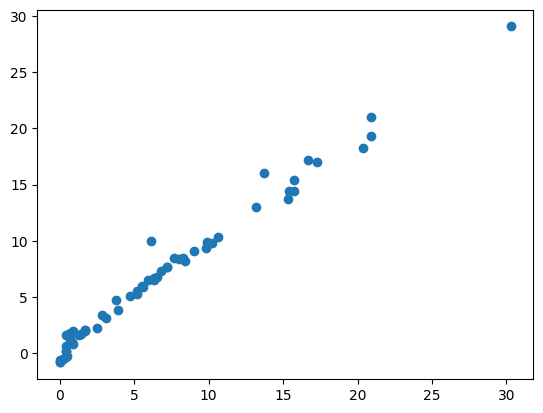

In [51]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

Ridge Lesso regression

mean absoulute error 0.5642305340105715
r2 scpre 0.9842993364555512


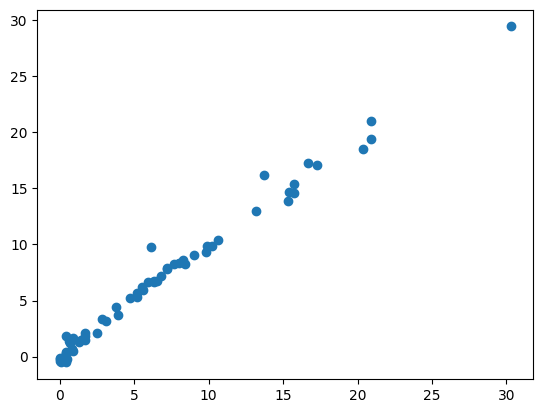

In [52]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

mean absoulute error 0.5642305340106358
r2 scpre 0.9842993364555516


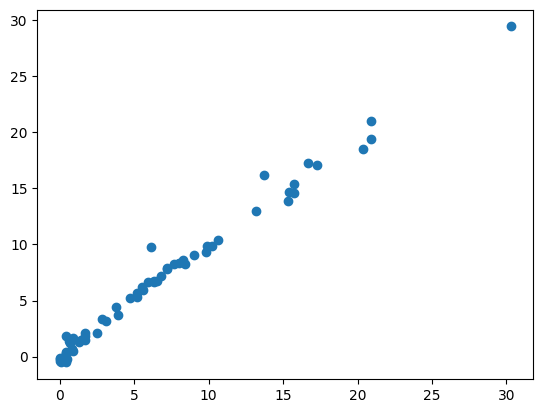

In [53]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
ridgecv = RidgeCV()
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

ElasticNet linear regression

mean absoulute error 1.8822353634896005
r2 scpre 0.8753460589519703


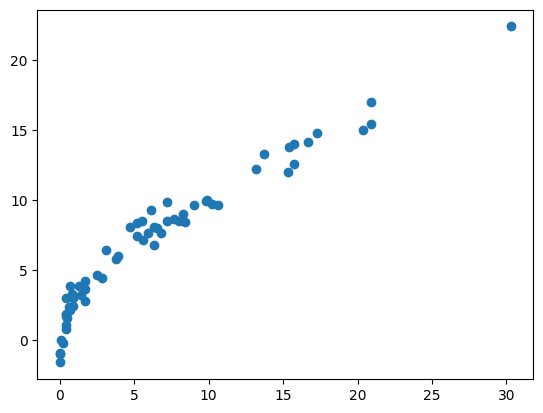

In [54]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled, y_train)
y_pred = elasticnet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

mean absoulute error 0.6575946731430898
r2 scpre 0.9814217587854941


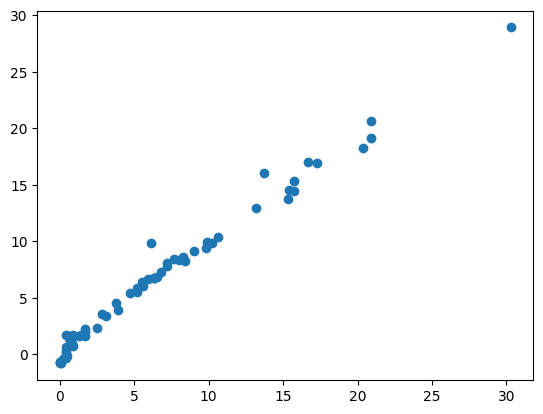

In [55]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score 
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train_scaled, y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean absoulute error", mae)
print("r2 scpre", score)
plt.scatter(y_test, y_pred)

In [58]:
##pickle the machine learning model, preprocessing model standardscaler
scaler

StandardScaler()

In [60]:
ridge

Ridge()

In [ ]:
import pickle 
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))